## PART 1 - CROSS-SECTION DATA

This part uses the dataset `HPRICE2.RAW` described in `HPRICE2.DES`.

---
#### **1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased.** 

Firstly, let $y$ and $x$ be two variables representing some population and, since the goal is to state the dependent variable $y$ in terms of the explanatory variable $x$, we write the simple linear regression model:

$$
y = \beta_{0} + \beta_{1} x + u,
$$

where the variable $u$ is the disturbance term, standed as well for the unobserved variable, which measures the effect of the change in $y$ with $x$ being unobserved. Moreover, $\beta_{0}$ is the intercept parameter and $\beta_{1}$ is called the slope parameter, because, considering $u$ fixed, then $\Delta u = 0$, and the variation of $y$ is linear with variation of $x$, *i.e.*,

$$
\Delta y = \beta_{1} \Delta x.
$$

In order to compute the estimators of $\beta_{0}$ and $\beta_{1}$, it is necessary to know the relation beteween the variables $u$ and $x$. To that, we can fist assume that the average alue of $u$ is zero, *i.e.*, 

$$
E(u) = 0.
$$

Defining the the coditional distribution of $u$ given $x$ and assuming that the average of $u$ does not depend on the value of $x$, we arrive in the following equality:

$$
E(u|x) = E(u) = 0.
$$

Finally, considering the equation above and applying the expectation on the simple linear regression model, we obtain:

$$
E(y|x) = \beta_{0} +  \beta_{1} x
$$

---
#### **2. Show that under this assumption the OLS estimators are indeed unbiased.**

In order to derive the Ordinary Least Squares (OLS) estimators, we consider $n$ samples $(x_{i}, y_{i})$ with $i = 1, \cdots, n$, described by

$$
y_{i} = \beta_{0} + \beta_{1} x_{i} + u_{i}.
$$

From the equation above, it is possible to isolate $u_{i}$ and, then, use the fundamental hypothesis compute the estimators $\hat \beta_{0}$ and $\hat \beta_{1}$, by the method of moments.

$$
u_{i} = y_{i} - \beta_{0} - \beta_{1} x_{i}
$$

$$
E(u_{i}) = 0 \iff E(y_{i} - \beta_{0} - \beta_{1} x_{i}) = 0
\iff \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat \beta_0 - \hat \beta_1x_i) = 0 \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad (1)
$$

$$
Cov(x,u) = E(xu) = 0 \iff E(x_{i}(y_{i} - \beta_{0} - \beta_{1} x_{i})) = 0 
\iff \frac{1}{n}\sum_{i=1}^{n}x_i(y_i - \hat \beta_0 - \hat \beta_1x_i) = 0 \quad \quad (2)
$$

Starting from the equations above, we obtaing the following system of equations, which will be solved for the variables $\hat \beta_{0}$ and $\hat \beta_{1}$.

$$
\left\{\begin{matrix}
\sum_{i=1}^{n}y_i - n \hat \beta_0 - \hat \beta_1 \sum_{i=1}^{n} x_i = 0 \quad \quad \quad \quad \quad \quad \quad (3)\\ 
\\
\sum_{i=1}^{n}x_iy_i - \hat \beta_0 \sum_{i=1}^{n} x_{i} - \hat \beta_1 \sum_{i=1}^{n} x_i^{2} = 0 \quad \quad \quad (4)
\end{matrix}\right.
$$

From the equation $(3)$, we obtain that 

$$
\hat \beta_0 = \bar{y} - \hat \beta_1 \bar{x}, \quad \quad (5)
$$

where 
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_{i} \quad \text{and} \quad \bar{y} = \frac{1}{n} \sum_{i=1}^{n}y_{i}.
$$

We now substitute the equation $(5)$ in the equation $(2)$, which gives us the following result:

$$
\sum_{i=1}^{n} x_{i} \left(y_{i} - (\bar{y} - \hat \beta_{1} \bar{x}) - \hat \beta_{1} x_{i}\right) = 0
\iff \sum_{i=1}^{n} x_{i} (y_{i} - \bar{y}) = \hat \beta_{1} \sum_{i=1}^{n} x_{i} (x_{i} - \bar{x}) \quad \quad (6)
$$

By using the following results, we can rewrite the equation $(6)$ and, therefore, isolate $\hat \beta_{1}$.

$$
\sum_{i=1}^{n} x_{i} (y_{i} - \bar{y}) = \sum_{i=1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y}) \quad \text{and} \quad 
\sum_{i=1}^{n} x_{i} (x_{i} - \bar{x}) = \sum_{i=1}^{n} (x_{i} - \bar{x})^{2} > 0
$$

$$
\hat \beta_{1} = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}} \quad \quad (7)
$$

In conclusion, the OLS estimators are given  by

$$
\hat \beta_{0} = \bar{y} - \hat \beta_{1} \bar{x} \quad \text{and} \quad \hat \beta_{1} = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}},
$$

where $\bar{x}$ and $\bar{y}$ are the means considering $n$ samples of the independent and dependent variables.

Now that the estimators have been computed, the goal is to prove that they are unbiased, by calculating their respective expectations. To that, we rewrite the expression of $\hat \beta_{1}$ as follows:

First, let $s_{x}^{2} = \sum_{i=1}^{n}(x_{i} - \bar{x})^{2}$. Then, $\hat \beta_{1}$ can we writen as:

$$
\hat \beta_{1} = \frac{\sum_{i=1}^{n} y_{i}(x_{i} - \bar{x})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}} = 
\frac{\sum_{i=1}^{n} (\beta_{0} + \beta_{1} x_{i} + u_{i})(x_{i} - \bar{x})}{s_{x}^{2}} = 
\frac{\beta_{0} \sum_{i=1}^{n} (x_{i} - \bar{x}) + \beta_{1} \sum_{i=1}^{n} (x_{i} - \bar{x}) x_{i} + \sum_{i=1}^{n} (x_{i} - \bar{x}) u_{i}}{s_{x}^{2}}
$$

From the expression above, we know that 
* $\sum_{i=1}^{n} (x_{i} - \bar{x}) = 0$

* $\sum_{i=1}^{n} (x_{i} - \bar{x}) x_{i} = s_{x}^{2}$

* $x_{i} - \bar{x} = d_{i}$

It turns out, then, that the slope estimator will be given by:

$$
\hat \beta_{1} = \frac{\beta_{1} s_{x}^{2} + \sum_{i=1}^{n} d_{i} u_{i}}{s_{x}^{2}} = 
\beta_{1} + \frac{1}{s_{x}^{2}} \sum_{i=1}^{n} d_{i} u_{i}
$$

Then, the bias of the estimator $\hat \beta_{1}$ is computed:

$$
b(\beta_{1}, \hat \beta_{1}) = E(\hat \beta_{1}) - \beta_{1} = \beta_{1} + \left( \frac{1}{s_{x}^{2}} \sum_{i=1}^{n} E(d_{i} u_{i}) \right) - \beta_{1} = 
\frac{1}{s_{x}^{2}} \sum_{i=1}^{n} d_{i} E(u_{i})
$$

Given that, by hypothesis, $E(u_{i}) = 0$, then the estimator $\hat \beta_{1}$ is unbiased, because $b(\beta_{1}, \hat \beta_{1}) = 0$.

We do the same procedure for $\hat \beta_{0}$, starting by writing it as a function of $\bar{x}$ and $\bar{u}$:

$$
\hat \beta_{0} = (\beta_{0} + \beta_{1} \bar{x} + \bar{u}) - \hat \beta_{1} \bar{x} = \beta_{0} + (\beta_{1} - \hat \beta_{1}) \bar{x} + \bar{u}
$$

Finally, the bias of the estimator $\hat \beta_{0}$ will be given by:

$$
b(\beta_{0}, \hat \beta_{0}) = E(\hat \beta_{0}) - \beta_{0} = \beta_{0} + E\left((\beta_{1} - \hat \beta_{1}) \bar{x}\right) + E(\bar{u}) - \beta_{0}
$$

By hypothesis, $E(u_{i}) = 0$ and, given that it was already proved that $E(\hat \beta_{1}) = \beta_{1}$, then, $E\left((\beta_{1} - \hat \beta_{1}) \bar{x}\right) = 0$.

From this, we conclude that $b(\beta_{0}, \hat \beta_{0}) = 0$, which means that the estimator is unbiased.

---
#### **3. Explain the sample selection bias with an example from the course.**

A sample selection bias occurs when the OLS estimator is affected by using data resulting from non-random sample selection. In an example involving fertilizer and land quality, seen in the course, the issue arises when experiments aren't entirely randomized. Factors known to the experimenter, such as sunlight exposure or susceptibility to pests, may influence the application of fertilizer, leading to sample selection bias.

---
#### **4. Explain the omitted variable bias with an example from the course**

This phenomenon happens when there is an exclusion of a relevant variable from the model. Generelly, in this case, the OLS estimators tend to be biased. To prove that, we first consider the true population model, consisting of two explanatory variables and one error term:

$$
y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + u.
$$

If we perform a simple linear regression of $y$ on $x_{1}$ exclusively, *i.e.*, we ignore $x_{2}$, we obtain an underspecified model, given by:

$$
\widetilde{y} = \widetilde{\beta_{0}} + \widetilde{\beta_{1}} x_{1}
$$

If we derive an expression for $\widetilde{\beta_{1}}$, we will otain the a similar equation as $(7)$, as follows:

$$
\widetilde{\beta_{1}} = \frac{\sum_{i=1}^{n} y_{i}(x_{i1} - \bar{x}_{1})}{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2}} \quad \quad \quad \quad (8)
$$

Next, considering the true model, for each observation $i$, we can write

$$
y_{i} = \beta_{0} + \beta_{1} x_{i1} + \beta_{2} x_{i2} + u_{i} \quad \quad (9)
$$

Substituting $(9)$ in $(8)$, the numerator of $(8)$ will be given by:

$$
\sum_{i=1}^{n} (\beta_{0} + \beta_{1} x_{i1} + \beta_{2} x_{i2} + u_{i})(x_{i1} - \bar{x}_{1}) = 
\beta_{1} \sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2} + \beta_{2} \sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) x_{i2} + \sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) u_{i} \quad \quad (10)
$$

With $(10)$, the equation $(8)$ can be rewritten as:

$$
\widetilde{\beta_{1}} = \beta_{1} + \beta_{2} \frac{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) x_{i2}}{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2}} + \frac{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) u_{i}}{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2}} \quad \quad (11)
$$

Finally, using the fact that $E(u_{i}) = 0$, we take the expectation of the estimator $\widetilde{\beta_{1}}$:

$$
E(\widetilde{\beta_{1}}) = \beta_{1} + \beta_{2} \frac{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) x_{i2}}{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2}} \neq \beta_{1},
$$

which leads to the fact that $\widetilde{\beta_{1}}$ is biased.

One example seen in the course, was the following model:

$$
wage = \beta_{0} + \beta_{1} education + \beta_{2} ability + u
$$

The bias of the estimator of $\beta_{1}$ was verified after having underspecified the model by running a simple linear regression of $wage$ on $education$, despising the $ability$ term.

---
#### **5. Explain the problem of multicollinearity. Is it a problem in this dataset?**

Multicollinearity refers to a situation in which two or more predictor variables in a multiple regression model are highly correlated. This means that one variable can be linearly predicted from the others with a substantial degree of accuracy.

If this is the case, the determinant of the matrix $X^{\prime}X$ becomes zero or nearly zero.

$$
det(X^\prime X) = 0 
$$

In such instances, the matrix $ (X^\prime X) $ is non-invertible, rendering the computation of the OLS estimator impossible.

The presence of multicollinearity can also be detected using the R-squared value. In this context, the R-squared value is obtained from regressing each predictor on all other predictors. A high R-squared value indicates that a predictor can be well explained by other predictors, suggesting the presence of multicollinearity.

Multicollinearity can inflate the variance of the coefficient estimates, making them unstable and difficult to interpret. This is problematic for understanding your model and making inferences about the relationships between variables.

One common method to quantify multicollinearity is the Variance Inflation Factor (VIF), which is defined as VIF = 1 / (1 - R-square). The VIF depends on the R-squared value and provides a measure of how much the variance of the estimated regression coefficient is increased due to multicollinearity.

In Python, it’s relatively straightforward to calculate the VIF using packages such as statsmodels. If multicollinearity is found to be a problem, you might consider dropping one of the correlated variables, combining the correlated variables into one, or using techniques such as ridge regression or principal component analysis.

Unfortunately, the dataset for this project exhibit multicollinearity, what's visible by the high values of VIF obtained.

In [549]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t, f, ttest_ind
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import grangercausalitytests

raw_data_path = 'textfiles/HPRICE2.raw'
labels_path = 'textfiles/HPRICE2.DES'

raw_data = np.loadtxt(raw_data_path)

# TO DO: read \n in the labels file
with open(labels_path, 'r') as file:
    file.readline()
    file.readline()

    labels_line = file.readline().strip()
    labels = np.array(labels_line.split())


df = pd.DataFrame(raw_data, columns=labels)

Y = df['price']
X = df.drop('price', axis=1)

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
# Exibir os resultados
print(vif_data)

     feature           VIF
0      crime      2.238702
1        nox   2999.062946
2      rooms    154.259820
3       dist     17.317832
4     radial     20.251521
5    proptax    327.750900
6    stratio    136.290494
7    lowstat     12.732855
8     lprice   1966.712684
9       lnox  10381.374134
10  lproptax   5710.168831


---
#### **6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100%**

In [550]:
nox_percentiles_threshholds = np.percentile(df['nox'], [25, 50, 75])
nox_categories = np.digitize(df['nox'], nox_percentiles_threshholds)

df['nox_category'] = nox_categories

low_nox = df[df['nox_category'] == 0]
medium_nox = df[df['nox_category'] == 1]
high_nox = df[df['nox_category'] == 2]

---
#### **7. Compute for each category of nox level the average median price and comment on your results**

From these results, it appears that there is a negative relationship between the level of NOx and the average median price. Properties in areas with low levels of NOx have the highest average median price, while those in areas with high levels of NOx have the lowest average median price. This could suggest that air quality, as indicated by NOx levels, may be a factor that influences property prices. However, this is just an observation from the given data. To establish a causal relationship, a more rigorous analysis would be needed, controlling for other factors that could also influence property prices.

In [551]:
print('Price means')
print('Low NOx: ', round(low_nox['price'].mean(), 2))
print('Medium NOx: ', round(medium_nox['price'].mean(), 2))
print('High NOx: ', round(high_nox['price'].mean(), 2))

Price means
Low NOx:  27079.58
Medium NOx:  25530.69
High NOx:  20624.14


---
#### **8. Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect?**

R-squared: 0.18150755188263268


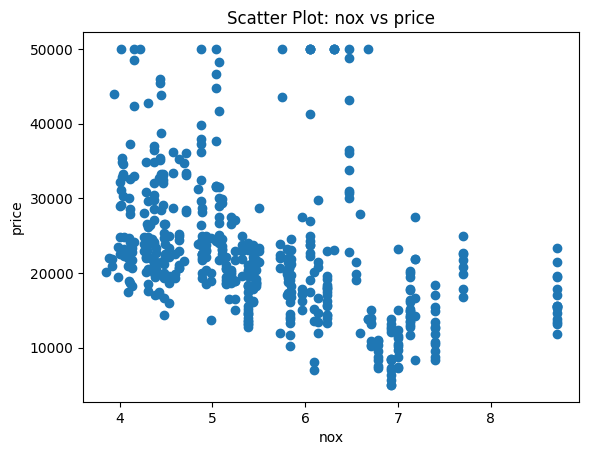

In [552]:
import statsmodels.api as sm

X = df['nox']
y = df['price']

X = sm.add_constant(X)  # Add a constant term to the predictor variable

model = sm.OLS(y, X).fit()  # Fit the linear regression model
r_squared = model.rsquared  # Get the R-squared value

print("R-squared:", r_squared)

plt.scatter(df['nox'], df['price'])
plt.xlabel('nox')
plt.ylabel('price')
plt.title('Scatter Plot: nox vs price')
plt.show()

# TO DO: comment the results

---
#### **9. Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.**

As for the histogram of residuals, if it has a mean of 0 but high variance, this could suggest the presence of collinearity among your independent variables. Collinearity refers to a situation in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy.

In the presence of collinearity, the estimate of one variable’s impact on the dependent variable price while holding the others constant may not be reliable. The standard errors can be inflated, leading to larger confidence intervals or non-significant results (due to higher p-values), even if the predictor variables are truly related to the outcome.


Question 9
Var(u|X) =  35953748.17


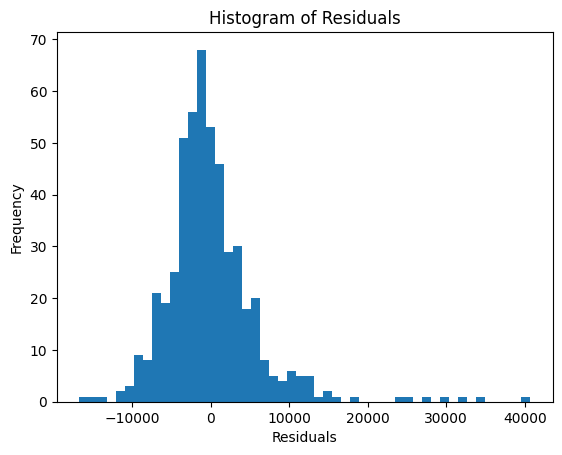

In [553]:
# Define the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)  # Add a constant column

# Define the dependent variable
y = df['price']

# Fit the regression model
model_fit_q9 = sm.OLS(y, X).fit()
residuals = model_fit_q9.resid

print('Question 9')
print('Var(u|X) = ', round(np.var(residuals), 2))

plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# TO DO: comment the results

Coeficients interpretations

**All constant (intercept)**: -18,680
- When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the dependent variable (price) is -18,680. This may not have much sense.

**Variable "crime":**: -136.5438
- Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 136.5438 units.

**Variable "nox":**: -660.4672
- Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 660.4672 units.

**Variable "rooms":**: 7797.9286
- Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 7797.9286 units.

**Variable "proptax":**: -89.4144
- Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 89.4144 units.

---
#### **10. Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.**

Regarding the histogram of residuals, if it has a mean of 0 and low variance, this suggests that the model’s assumptions are likely being met. The residuals of a well-specified linear regression model should be normally distributed with a mean of 0, and having low variance indicates homoscedasticity at a certain level, which is another assumption of linear regression. However, it’s always a good idea to conduct formal statistical tests or use diagnostic plots to check these assumptions more rigorously.

Question 10
Var(u|X) =  0.06


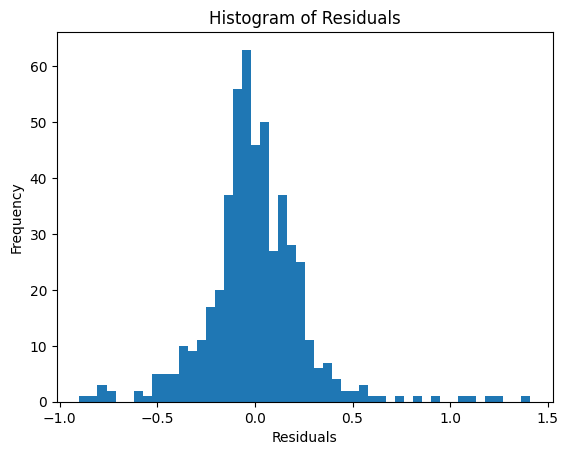

In [554]:
# Define the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)  # Add a constant column

# Define the dependent variable
Y = df['lprice']

# Fit the regression model
model_fit_q10 = sm.OLS(Y, X).fit()
residuals = model_fit_q10.resid

print('Question 10')
print('Var(u|X) = ', round(np.var(residuals), 2))

plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Coeficients interpretations

**All constant (intercept)**: 8.6550
- When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the price is 8.6550.

**Variable "crime"**: -0.0125
- Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 0.0125 units.

**Variable "nox"**: -0.0476
- Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 0.0476 units.

**Variable "rooms"**: 0.2816
- Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 0.2816 units.

**Variable "proptax"**: -0.0043
- Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 0.0043 units.

---
#### **11. Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the histogram of the residuals. Interpret all coefficients.**

As for the histogram of residuals, since it’s quite similar to the previous question with a mean of 0 and low variance, this suggests that the model’s assumptions are likely being met.

Question 11
Var(u|X) =  0.07


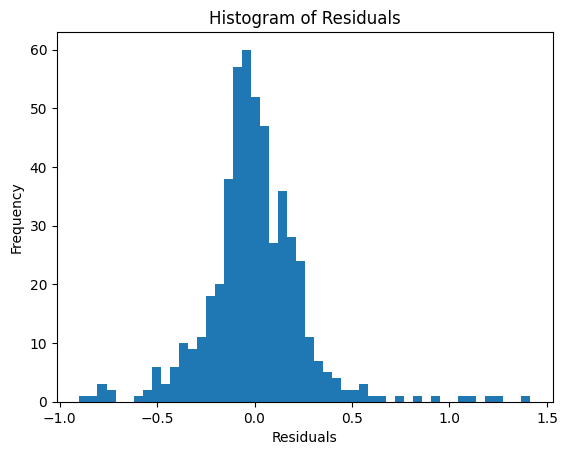

In [555]:
import statsmodels.api as sm

# Define the independent variables
X = df[['crime', 'lnox', 'rooms', 'proptax']]
X = sm.add_constant(X)  # Add a constant column

# Define the dependent variable
y = df['lprice']

# Fit the regression model
model_fit_q11 = sm.OLS(y, X).fit()
residuals = model_fit_q11.resid

print('Question 11')
print('Var(u|X) = ', round(np.var(residuals), 2))

plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Coeficients interpretation

**All constant (intercept)**: 8.8553
- When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the price is 8.8553.

**Variable "crime"**: -0.0125
- Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 0.0125 units.

**Variable "nox"**: -0.0476
- Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 0.0476 units.

**Variable "rooms"**: 0.2816
- Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 0.2816 units.

**Variable "proptax"**: -0.0042
- Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 0.0042 units.

---
#### **12. In the specification of question 10, test the hypothesis H0: $\beta_{nox} < 0$ vs. H1: $\beta_{nox} > 0$ at the 1% level.**

To test the hypothesis H0: $\beta_{nox} < 0$ vs. H1: $\beta_{nox} > 0$ at the 1% level, we would first run the regression and obtain the estimated coefficient $\hat{\beta}_{nox}$ and its standard error. 

Next, we calculate the t-statistic as $\frac{\hat{\beta}_{nox}}{SE(\hat{\beta}_{nox})}$. This t-statistic follows a t-distribution under the null hypothesis.

Since we are testing $\beta_{nox} > 0$, we are interested in the right tail of the t-distribution. We compare our calculated t-statistic with the critical value from the t-distribution table at the 1% significance level. If our t-statistic is greater than the critical value, we reject the null hypothesis.

The p-value is the smallest significance level at which we would reject the null hypothesis. It's the probability of observing a t-statistic as extreme as, or more extreme than, the one calculated, given that the null hypothesis is true. We can find the p-value using statistical software, which calculates the area under the t-distribution to the right of our calculated t-statistic.

If the reported p-value is less than 0.01 (the 1% significance level), we reject the null hypothesis and conclude that $\beta_{nox} > 0$.

In [556]:
#Get information from the model
beta_nox = model_fit_q10.params['nox']
se_nox = model_fit_q10.bse['nox']

# t-statistic
t_value = beta_nox / se_nox
deg_freedom = model_fit_q10.df_resid

# One-sided p-value
p_value_one_tailed = 1 - t.cdf(abs(t_value), deg_freedom)
alpha = 0.01

# Compare the p-value with the significance level
if p_value_one_tailed < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value_one_tailed:.7f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value_one_tailed:.7f}')

Reject the null hypothesis. p-value: 0.0002053


---
#### **13. In the specification of question 10, test the hypothesis H0: $\beta_{nox}$ = 0 vs. H1: $\beta_{nox}$ ≠ 0 at the 1% level using the p-value of the test.**

In [557]:
#Get information from the model
beta_nox = model_fit_q10.params['nox']
se_nox = model_fit_q10.bse['nox']

# t-statistic
t_value = beta_nox / se_nox

# Two-sided p-value
p_value_two_tailed = 2 * (1 - t.cdf(abs(t_value), deg_freedom))
alpha = 0.01

# Compare the p-value with the significance level
if p_value_two_tailed < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value_two_tailed:.7f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value_two_tailed:.7f}')

Reject the null hypothesis. p-value: 0.0004107


---
#### **14. In the specification of question 10, test the hypothesis H0: $\beta_{crime}$ = $\beta_{proptax}$ at the 10% level.**

In [558]:
#Get information from the model
beta_crime = model_fit_q10.params['crime']
beta_proptax = model_fit_q10.params['proptax']
se_crime = model_fit_q10.bse['crime']
se_proptax = model_fit_q10.bse['proptax']

# Get covariance matrix
cov_matrix = model_fit_q10.cov_params()
cov_crime_proptax = cov_matrix.loc['crime', 'proptax']

# Sqrt of the sum of squared standard errors minus 2 times the covariance
se_crime_minus_proptax = np.sqrt(se_crime**2 + se_proptax**2 - 2 * cov_crime_proptax)

# t-statistic
t_value = (beta_crime - beta_proptax) / se_crime_minus_proptax
deg_freedom = model_fit_q10.df_resid

# Two-sided p-value
p_value = 2 * (1 - t.cdf(abs(t_value), deg_freedom))
alpha = 0.1

# Compare the p-value with the significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.7f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value:.7f}')

Reject the null hypothesis. p-value: 0.0003202


---
#### **15. In the specification of question 10, test the hypothesis H0: $\beta_{crime} = 0$, $\beta_{proptax} = 0$ at the 10% level.** 

In [559]:
# Define X unrestricted and restricted
X_ur = df[['crime', 'nox', 'rooms', 'proptax']]
X_ur = sm.add_constant(X_ur)

Xr = df[['nox', 'rooms']]
Xr = sm.add_constant(Xr)

Y = df['lprice']

model_ur = sm.OLS(Y, X_ur).fit()
model_r = sm.OLS(Y, Xr).fit()

SSR_ur = model_ur.ssr
SSR_r = model_r.ssr

alpha = 0.1
q = model_r.df_resid - model_ur.df_resid
n_k_1 = model_ur.df_resid

F = ((SSR_r - SSR_ur) / q) / (SSR_ur / n_k_1)
p_value = 2 * (1 - f.cdf(F, q, n_k_1))

print(f'F-value: {F:.2f}')

alpha = 0.1

if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.30f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value:.30f}')

F-value: 64.43
Reject the null hypothesis. p-value: 0.000000000000000222044604925031


---
#### **16. In the specification of question 10, test the hypothesis H0: $\beta_{crime}$ = -500, $\beta_{proptax}$ = -100 at the 10% level.**

In [560]:
# Define X unrestricted and restricted
X_ur = df[['crime', 'nox', 'rooms', 'proptax']]
X_ur = sm.add_constant(X_ur)

X_r = df[['nox', 'rooms']]
X_r = sm.add_constant(X_r)

Y_ur = df['lprice']
Y_r = df['lprice'] + 500*df['crime'] + 100*df['proptax']

model_ur = sm.OLS(Y_ur, X_ur).fit()
model_r = sm.OLS(Y_r, X_r).fit()

SSR_ur = model_ur.ssr
SSRr = model_r.ssr

alpha = 0.1
q = model_r.df_resid - model_ur.df_resid
n_k_1 = model_ur.df_resid

F = ((SSRr - SSR_ur) / q) / (SSR_ur / n_k_1)
p_value = 1 - f.cdf(F, q, n_k_1)

print(f'F-value: {F:.2f}')
alpha = 0.1

if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.30f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value:.30f}')

F-value: 80013196057.37
Reject the null hypothesis. p-value: 0.000000000000000111022302462516


---
#### **17. In the specification of question 10, test the hypothesis H0: $\beta_{crime}$ + $\beta_{proptax}$ = -1000 at the 10% level.** 

In [561]:
X = df[['crime', 'nox', 'rooms']].copy()
X['crime_minus_tax'] = df['crime'] - df['proptax']
X = sm.add_constant(X)

Y = df['lprice']

# We first consider our model as:
#   lprice = b_const + b_crime * crime + b_nox * nox + b_rooms * rooms + b_proptax * proptax + u
# 
# Then we assume that:
#   theta = b_crime + b_proptax
#   b_crime =  theta - b_proptax
# 
# And our model becomes:
#   lprice = 
#       b_const + 
#       theta * crime + 
#       b_nox * nox + 
#       b_rooms * rooms + 
#       b_proptax * (crime - proptax) + 
#       u

model_fit_q17 = sm.OLS(Y, X).fit()

theta = model_fit_q17.params['crime']
bse_crime = model_fit_q17.bse['crime']

# H0: theta = -1000
t_value = (theta + 1000) / bse_crime
alpha = 0.1

print(f't-value: {t_value:.2f}')

# Two-sided p-value
p_value_two_tailed = 2 * (1 - t.cdf(abs(t_value), deg_freedom))
alpha = 0.01

# Compare the p-value with the significance level
if p_value_two_tailed < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value_two_tailed:.30f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value_two_tailed:.30f}')

t-value: 665984.31
Reject the null hypothesis. p-value: 0.000000000000000000000000000000


---
#### **18. In the specification of question 10, test the hypothesis that all coefficients are the same for observations with low levels of nox vs. medium and high levels of nox.**

In [562]:
# Fit the models
low_nox = df[df['nox_category'] == 0].copy()
medium_high_nox = df[df['nox_category'] != 0].copy()

# Fit the unrestricted model
X_ur = low_nox[['crime', 'nox', 'rooms', 'proptax']]
X_ur = sm.add_constant(X_ur)
Y_ur = low_nox['lprice']

model_ur = sm.OLS(Y_ur, X_ur).fit()

# Fit the restricted model
X_r = sm.add_constant(medium_high_nox[['crime', 'nox', 'rooms', 'proptax']])[['const']]
Y_r = medium_high_nox['lprice'] \
    - model_ur.params['crime'] * medium_high_nox['crime'] \
    - model_ur.params['nox'] * medium_high_nox['nox'] \
    - model_ur.params['rooms'] * medium_high_nox['rooms'] \
    - model_ur.params['proptax'] * medium_high_nox['proptax']

model_r = sm.OLS(Y_r, X_r).fit()

# Calculate the F-statistic
SSR_ur = model_ur.ssr
SSRr = model_r.ssr

alpha = 0.1
q = model_r.df_resid - model_ur.df_resid
n_k_1 = model_ur.df_resid

F = ((SSRr - SSR_ur) / q) / (SSR_ur / n_k_1)
p_value = 1 - f.cdf(F, q, n_k_1)

print(f'F-value: {F:.2f}')
alpha = 0.1

if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.30f}')
else:
    print(f'Fail to reject the null hypothesis. p-value: {p_value:.30f}')

F-value: 142.21
Reject the null hypothesis. p-value: 0.000000000000000111022302462516


---
#### **19. Repeat the test of question 18 but now assuming that only the coefficients of nox and proptax can change between the two groups of observations. State and test H0.** 

In [563]:
# Fit the models
low_nox = df[df['nox_category'] == 0].copy()
medium_high_nox = df[df['nox_category'] != 0].copy()

# Fit the unrestricted model
X_ur = low_nox[['crime', 'nox', 'rooms', 'proptax']]
X_ur = sm.add_constant(X_ur)
Y_ur = low_nox['lprice']

model_ur = sm.OLS(Y_ur, X_ur).fit()

# Fit the restricted model
X_r = medium_high_nox[['crime', 'rooms']]
X_r = sm.add_constant(X_r)
Y_r = medium_high_nox['lprice'] \
    - model_ur.params['nox'] * medium_high_nox['nox'] \
    - model_ur.params['proptax'] * medium_high_nox['proptax']

model_r = sm.OLS(Y_r, X_r).fit()

SSR_ur = model_ur.ssr
SSRr = model_r.ssr

alpha = 0.1
q = model_r.df_resid - model_ur.df_resid
n_k_1 = model_ur.df_resid

F = ((SSRr - SSR_ur) / q) / (SSR_ur / n_k_1)
p_value = 1 - f.cdf(F, q, n_k_1)

print(f'F-value: {F:.10f}')
alpha = 0.1

if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.30f}')
else:
    print(f'Fail to reject the null hypothesis. p-value: {p_value:.30f}')

F-value: 12.7436641940
Reject the null hypothesis. p-value: 0.000000000000000111022302462516


## PART 2 - HETEROSKEDASTICITY 
---
#### **20. Explain the problem of heteroskedasticity with an example of the course.** 

Firstly, under homoskedasticity, the variances of the error term $u$ and the dependent variable $y$ are assumed to be constant, *i.e.*, 

$$
Var(u|x) = Var(y|x) = \sigma^{2}
$$

However, under heteroskedasticity conditions, what happens is that the variance of the error $Var(u|x)$ depends on the independent variable $x$. Consequently, the variance of $y$ $Var(y|x)$ will also depend on $x$. This violation of the homoskedasticity assumption can lead to issues, such as biased standard errors and inefficient parameter estimates in Ordinary Least Squares regression.

In the example studied in course, the examination of the education-wage relationship underscores the challenge posed by heteroskedasticity. The quest for an unbiased estimation of education's impact on wages necessitates the assumption $E(u|educ) = 0$, accompanied by the assumption of homoskedasticity $Var(u∣educ) = \sigma^{2}$. This implies constant wage variance $Var(wage∣educ) = \sigma^{2}$ across education levels, allowing for varying mean wages while assuming consistent variance. However, the realism concern is acknowledged: higher education levels may introduce greater wage variability due to diverse job opportunities, contrasting with lower variability at lower education levels.

Expanding on this, assume we build a model assuming homoskedasticity, implying constant error term variance across education levels. In the real world, individuals with higher education may experience more diverse work opportunities, leading to increased wage variability. Conversely, those with lower education levels may face fewer opportunities, resulting in reduced wage variability. Thus, insisting on homoskedasticity introduces bias into the model, as it overlooks the varying wage volatility associated with different education levels.

---
#### **X 21. Suppose that $ E(u u')= \sigma^2 \Omega$. Show that the GLS estimator is the best linear unbiased estimator.**

Fistly, considering the model $y = X \beta + u$, where $E(u|X) = 0$, we derive the expression of the OLS estimator of $\beta$, called $b$. Considering a set of $n$ i.i.d. observations, the collected data is represented by the following esquation:

$$
y = X b + u \quad \quad \quad \quad (12)
$$

By expliciting the matrix notation of the equation (12), we obtain the following equivalent equation:

$$
\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{N}
\end{bmatrix} = \begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1K}\\ 
x_{21} & x_{21} & \cdots & x_{2K}\\ 
\vdots & \vdots & \ddots & \vdots\\ 
x_{N1} & x_{N2} & \cdots & x_{NK} 
\end{bmatrix}
\begin{bmatrix}
b_{1}\\
b_{2}\\
\vdots\\
b_{K}
\end{bmatrix}
+
\begin{bmatrix}
u_{1}\\
u_{2}\\
\vdots\\
u_{N}
\end{bmatrix}
$$

In order to derive an expression for $b$, we minimize sum of the squared residuals, i.e., we minimize

$$
u' u = \begin{bmatrix}
u_{1}\ u_{2}\ \cdots\ u_{N}
\end{bmatrix} \begin{bmatrix}
u_{1}\\
u_{2}\\
\vdots\\
u_{N}
\end{bmatrix}= \sum_{i=1}^{N} u_{i}^{2}
$$

To that, it is first necessary to isolate the expression of $u$ and then, compute its transpose, so that the product $u' u$ can be minimized. From the equation (12), is given by:

$$
u = y - X b \Rightarrow u' = (y - X b)' = y' - b' X'
$$

Thus, the product to be minimized is:

$$
u' u = (y' - b' X')(y - X b) = y'y - y'Xb - b'X'y + b'X'Xb 
$$

By noting that $b'X'y = (b'X'y)' = y'Xb$, we arrive in the following expression:

$$
\text{min } u'u = y'y - 2b'X'y + b'X'Xb \quad \quad (13)
$$

Finally, what is necessary to do is to take the partial derivative of the equation $(13)$ with respect to $b$ and solve it when it is equal to zero. To that, we use the two following results:

$$
\left\{\begin{matrix}
\frac{\partial}{\partial b} (b'X'y) = X'y \\ 
\frac{\partial}{\partial b} (b'X'Xb) = 2X'Xb 
\end{matrix}\right.
$$

With the above, the equation to be solved for $b$ will be:

$$
\frac{\partial}{\partial b} (u'u) = 0 \iff -2X'y + 2X'Xb = 0 \iff X'Xb = X'y \iff b = (X'X)^{-1}X'y \quad (14)
$$

Now that the estimator has been computed as shown in the equation $(14)$, to shown that it is the best linear unbiased estimator (BLUE), we first check that it is linear. Indeed, the linearity is checked immediately by seeing the linear relatioship between $b$ and the dependent variable $y$. The second step is to show its unbiasedness. To that, we compute its expected value.

$$
E(b) = E\left((X'X)^{-1}X'y\right) = (X'X)^{-1}X'E(y) \quad \quad (15)
$$

Since the assumption $E(u|X) = 0$ holds, then $E(y) = X \beta$ and the equation $(15)$ can be written as follows, proving that the estimator $b$ is unbiased.

$$
E(b) = (X'X)^{-1}(X'X) \beta \iff E(b) = \beta
$$

Now, for the next steps, it is useful to rewrite the expression of $b$ as follows:

$$
\left.\begin{matrix}
y = X \beta + u \\ 
b = (X'X)^{-1}X'y
\end{matrix}\right\}\Rightarrow 
b = \beta + (X'X)^{-1}X'u \quad \quad (16)
$$

With the equation $(16)$, we compute the variance of the estimator considering the Heteroskedasticity supposition that $Var(u) = E(uu') = \sigma^{2}\Omega$.

$$
\begin{align*}
Var(b) &= Var\left(\beta + (X'X)^{-1}X'u\right) \\
       &= Var\left((X'X)^{-1}X'u\right) \\
       &= (X'X)^{-1}X' Var(u) X(X'X)^{-1} \\
       &= (X'X)^{-1}X' \sigma^{2} \Omega X(X'X)^{-1}\\
\end{align*}
$$

Therefore, the equation $(17)$ contains the result of the variance of the estimator, considering Heteroskedasticity.

$$
Var(b) = \sigma^{2} (X'X)^{-1}X' \Omega X(X'X)^{-1} \quad \quad (17)
$$





---
#### **22. In the specification of question 9, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of $u^2$ on constant, crime, nox, rooms, proptax, test $H_0: \delta_{\text{crime}}, \delta_{\text{nox}}, \delta_{\text{rooms}}, \delta_{\text{proptax}} = 0$, where the coefficients $\delta_k$ (k = crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.**

In [564]:
X = df[['crime', 'nox', 'rooms', 'proptax']].copy()
X = sm.add_constant(X)  # Add a constant column

u = model_fit_q9.resid
u2 = u**2

model_fit_q22 = sm.OLS(u2, X).fit()

f_value = model_fit_q22.fvalue
print(f'F-value: {F:.10f}')

q = len(model_fit_q22.params) - 1
n_k_1 = model_fit_q22.df_resid

p_value = 1 - f.cdf(f_value, q, n_k_1)
print(f'p-value: {p_value:.30f}')

F-value: 12.7436641940
p-value: 0.000024672073438924968513674685


---
#### **23. In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form**

In [565]:
X = df[['crime', 'nox', 'rooms', 'proptax']].copy()
X = sm.add_constant(X)  # Add a constant column

u = model_fit_q10.resid
u2 = u**2

model_fit_q23 = sm.OLS(u2, X).fit()

f_value = model_fit_q23.fvalue
print(f'F-value: {F:.10f}')

q = len(model_fit_q23.params) - 1
n_k_1 = model_fit_q23.df_resid

p_value = 1 - f.cdf(f_value, q, n_k_1)
print(f'p-value: {p_value:.30f}')

F-value: 12.7436641940
p-value: 0.000000000000083266726846886741


---
#### **24.  In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form**

In [566]:
X = df[['crime', 'nox', 'rooms', 'proptax']].copy()
X = sm.add_constant(X)  # Add a constant column

u = model_fit_q11.resid
u2 = u**2

model_fit_q24 = sm.OLS(u2, X).fit()

f_value = model_fit_q24.fvalue
print(f'F-value: {F:.10f}')

q = len(model_fit_q24.params) - 1
n_k_1 = model_fit_q24.df_resid

p_value = 1 - f.cdf(f_value, q, n_k_1)
print(f'p-value: {p_value:.30f}')

F-value: 12.7436641940
p-value: 0.000000000000084598994476436928


---
#### **X 25. Comment on the differences between your results of questions 22,23, 24.**

TO DO: complete

---
#### **26. Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight.**

In [567]:
X = df[['crime', 'nox', 'rooms', 'proptax']]  # independent variables
X = sm.add_constant(X)  # adding a constant
Y = df['price']  # dependent variable

# Run OLS regression
model_fit = sm.OLS(Y, X).fit()
residuals = model_fit.resid
residuals_squared = residuals**2

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['variable', 'p-value'])

# Regress each variable on the squared residuals and store the results
for var in X.columns:
    model = sm.OLS(residuals_squared, X[[var]])
    results = model.fit()
    results_df = results_df.add({'variable': var, 'p-value': results.pvalues[var]})
    print(f'{var}: {results.pvalues[var]:.15f}')

weights = 1. / np.abs(residuals)

# Run WLS regression
model_wls = sm.WLS(Y, X, weights=weights)
results_wls = model_wls.fit()

print(results_wls.summary())

const: 0.000000000119827
crime: 0.000036754965969
nox: 0.000000000002731
rooms: 0.000000000347168
proptax: 0.000000000000003
                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            WLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1126.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          8.53e-249
Time:                        21:57:04   Log-Likelihood:                -4785.6
No. Observations:                 506   AIC:                             9581.
Df Residuals:                     501   BIC:                             9602.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

## PART 3 - TIME SERIES DATA

This part uses the `threecenturies_v2.3` datasets. 

**Import Real GDP at market prices, unemployment rate and consumer price inflation for the period 1900-2000 in Python from the A1 worksheet.**

In [568]:
df = pd.read_excel('threecenturies_v2.3.xlsx', sheet_name='A1. Headline series', header=3)
df = df.drop(df.index[:3])
df.rename(columns={'Description': 'Year'}, inplace=True)
df = df[['Year', 'Real GDP at market prices', 'Unemployment rate', 'Consumer price inflation']]
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)]
df.reset_index(drop=True, inplace=True)
df

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
0,1900,181160.264436,3.679865,4.058273
1,1901,184974.529384,4.877351,-0.3
2,1902,187756.550527,5.145694,0
3,1903,186015.76815,5.603507,1.10331
4,1904,188155.559259,6.914821,-0.396825
...,...,...,...,...
96,1996,1243709,8.097052,2.400308
97,1997,1282602,6.972014,1.824606
98,1998,1323527,6.255467,1.557398
99,1999,1366983,5.976813,1.32871


---
#### **27. Define strict and weak stationarity.**

* **Strict stationarity:** A time series process is considered strictly stationary if the joint probability distribution of its observations remains invariant under shifts in time. In other words, for any set of time points, the entire probability distribution of the data, including the mean, variance, and higher-order moments, remains constant. This implies that all statistical properties of the time series are unchanged over time, making strict stationarity a more stringent condition compared to covariance stationarity, for example.


* **Weak stationarity:** A time series process is said to be weak stationary if it presents constants mean, variance and autocorrelation structutre over time, but not its entire probability distribution. 

---
#### **28. Explain ergodicity and state the ergodic theorem. Illustrate with an example.**

* **Ergodicity:** It is a mathematical concept characterizing a system's behavior over time, emphasizing the system's ability to forget its initial conditions. It asserts that, over a sufficiently long period, a point within the system will uniformly and randomly explore all parts of its space. This implies that the system's average behavior can be deduced from the trajectory of a representative point. In other words, a substantial collection of random samples from the system serves as an effective representation of the average statistical properties of the entire process.


* **Ergodic theorem:** If a time series $\{y_{t}\}$ is strictly stationary and ergodic, and the expected value of the stochastic process exists, *i.e.*, $E(Y_{t}) < \infty$ as $t \rightarrow \infty$, then its temporal average converges to the spatial average (the expectation) as the number of observations increases. In other words, the average temporal behavior of the system is equivalent to its average spacial behavior.


* **Example:** Consider the case of fair coin tosses. The ergodicity implies that over a large number of tosses, the observed proportion of heads and tails will converge to the theoretical probabilities of the coin ($0.5$ for heads and $0.5$ for tails). This convergence illustrates that the long-term behavior of the coin toss process aligns with the underlying probabilities of the fair coin, despite the inherent randomness of each individual toss.

---
#### **29. Why do we need both stationarity and ergodicity?**

These conditions are necessary to utilize the ergodic theorem, enabling us to estimate the expectation of the process based on the average of a suitably large sample.

---
#### **30. Explain “spurious regression”.**

Spurious regression occurs when two time series variables seem to be correlated or show a substantial statistical relationship, despite being independent and unrelated. This occurrence is closely linked to the existence of stochastic trends in the time series data.

---
#### **31. Define a moving average and explain the trade-off involved in the choice of the size of the window and of whether to center or not the moving average.**

A moving average is a computation applied to time series to smooth out short-term fluctuations and highlight longer-term trends or cycles in the data. To compute it, we consider the average of a set of values within a defined window as it moves through the time series.


The trade-off is exlpained by the fact that a larger window provides smoother results but introduces lag, while a smaller window offers a quick response but may capture more noise. Centered moving averages prioritize accuracy in trend representation but come with added lag, while non-centered alternatives prioritize timeliness but may sacrifice some accuracy.

---
#### **32. Make all time series stationary by computing the difference between the original variable and a moving average of order 10.**

In [569]:
columns_to_average = df.columns[1:]
df_stationary = df.copy()

for column in columns_to_average:
    df_stationary[column] = df_stationary[column] - df_stationary[column].rolling(window=10).mean()

df_stationary

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
0,1900,NaN,NaN,NaN
1,1901,NaN,NaN,NaN
2,1902,NaN,NaN,NaN
3,1903,NaN,NaN,NaN
4,1904,NaN,NaN,NaN
...,...,...,...,...
96,1996,110126.0,-0.771393,-1.650728
97,1997,123193.4,-1.550303,-2.088396
98,1998,140128.6,-2.034953,-2.135426
99,1999,158048.1,-2.189149,-1.973224


---
#### **33. Compute the difference between the resulting time series of question 32 and a moving average of order 5. Give the exact formula for the weights after the two transformations.**

Question 32: $[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]$ 

Question 33: $[0.2, 0.2, 0.2, 0.2, 0.2]$

In [570]:
df_mov_avg_5 = df.copy()
df_diff = df.copy()

for column in columns_to_average:
    df_mov_avg_5[column] = df_mov_avg_5[column].rolling(window=5).mean()
    df_diff[column] = df_stationary[column] - df_mov_avg_5[column]

df_diff

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
0,1900,NaN,NaN,NaN
1,1901,NaN,NaN,NaN
2,1902,NaN,NaN,NaN
3,1903,NaN,NaN,NaN
4,1904,NaN,NaN,NaN
...,...,...,...,...
96,1996,-1067792.2,-10.079318,-4.411388
97,1997,-1089036.6,-10.262643,-4.361668
98,1998,-1109027.4,-9.923436,-4.218876
99,1999,-1127875.7,-9.373775,-3.926719


---
#### **34. Using the original dataset, test the unit root hypothesis for all variables.**

In [571]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for each variable
for column in df.columns[2:]:
    result = adfuller(df[column].dropna(), maxlag=0)
    print(f'{column}')
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}\n')

Unemployment rate
ADF Statistic: -2.045
p-value: 0.267

Consumer price inflation
ADF Statistic: -3.669
p-value: 0.005



---
#### **35. Transform all variables so that they are stationary using either your answers to questions 32-33 or to question 34.**

In [572]:
df_diff = df.copy()

for column in df.columns[1:]:
    df_diff[column] = df[column].diff()

df_diff

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
0,1900,NaN,NaN,NaN
1,1901,3814.264947,1.197486,-4.358273
2,1902,2782.021143,0.268343,0.3
3,1903,-1740.782376,0.457813,1.10331
4,1904,2139.791108,1.311314,-1.500135
...,...,...,...,...
96,1996,30911,-0.524736,-0.256144
97,1997,38893,-1.125038,-0.575702
98,1998,40925,-0.716547,-0.267209
99,1999,43456,-0.278654,-0.228687


---
#### **36. Explain the difference between ACF and PACF.**

ACF measures the correlation between a time series and its own lagged values at various time lags, while PACF measures the correlation between a time series and its own lagged values while controlling for the effect of other lags. 

While ACF provides an overall view of the correlation structure, including both direct and indirect influences of all lags, PACF focuses on the direct correlation between an observation and its lag, excluding the influence of intermediate lags.

---
#### **X 37. Plot and comment on the ACF and PACF of all variables.**

TO DO: comment

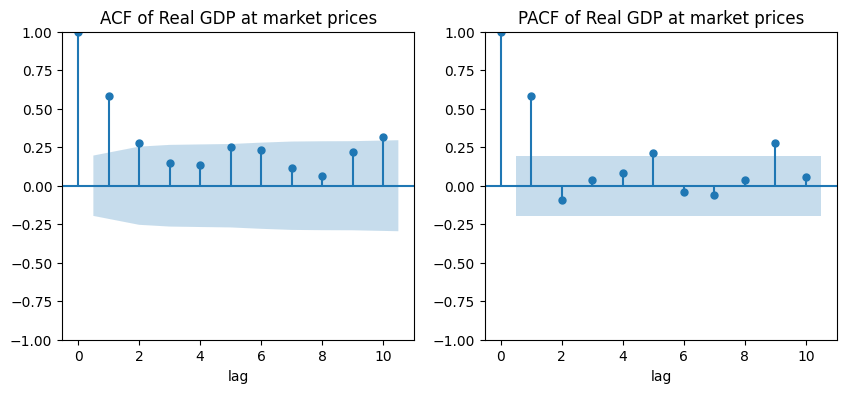

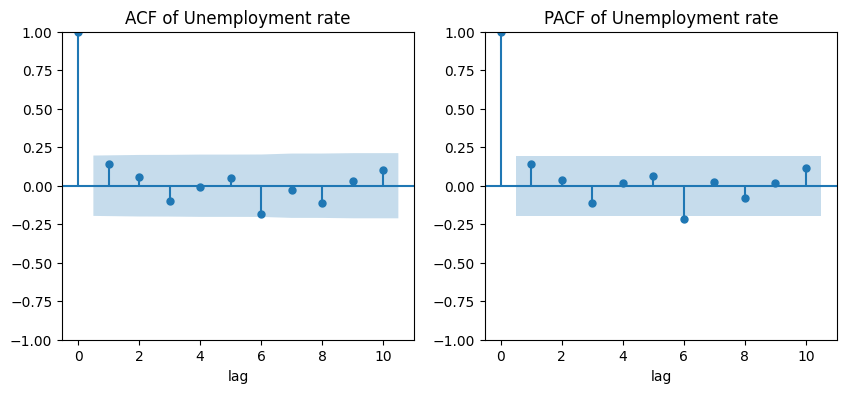

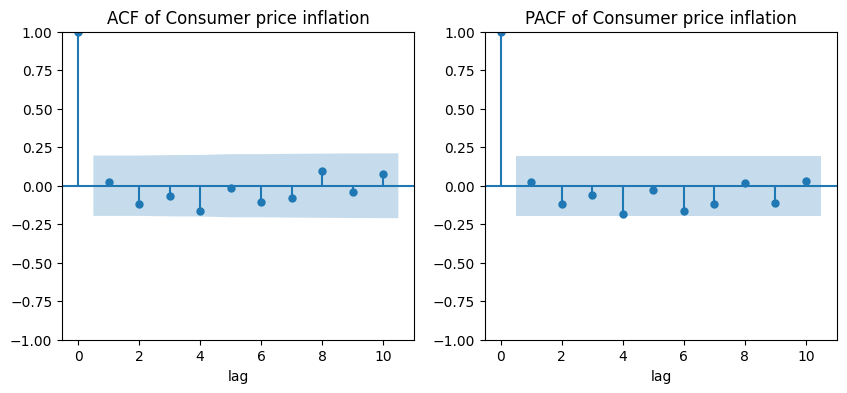

In [573]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_diff = df.copy()
df_diff['Real GDP at market prices'] = df['Real GDP at market prices'].diff().dropna()
df_diff['Unemployment rate'] = df['Unemployment rate'].diff().dropna()
df_diff['Consumer price inflation'] = df['Consumer price inflation'].diff().dropna()

df_diff.dropna(inplace=True)

for column in columns_to_average:
    column_values = df_diff[column]

    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Plot on the left subplot
    plot_acf(column_values, ax=axs[0], lags=10)
    axs[0].set_title(f'ACF of {column}')
    axs[0].set_xlabel('lag')
    
    # Plot on the right subplot
    plot_pacf(column_values, ax=axs[1], lags=10)
    axs[1].set_title(f'PACF of {column}')
    axs[1].set_xlabel('lag')

---
#### **38. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion.**

The principle of parsimony, related to Ockham's razor, emphasizes favoring simpler explanations or models. In the context of information criteria like Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), which balance goodness of fit and model complexity, parsimony is reflected by penalizing overly complex models. This encourages selecting models that effectively explain data while remaining as simple as necessary, aligning with the philosophy of Ockham's razor to prefer simplicity in explanations.

---
#### **39. Explain the problem of auto-correlation of the errors.**

Autocorrelation of errors occurs when the error terms within a regression model present correlation among themselves. This implies that the errors in a given period are influenced by the errors in preceding periods, violating the assumption of error independence. The autocorrelation brings challenges for ordinary least squares (OLS) estimation: while the estimated regression coefficients remain unbiased, they lose the characteristic of minimum variance. In addition to that, the Mean Squared Error (MSE) may significantly underestimate the true error variance, and the standard error of regression coefficients may substantially underestimate the actual standard deviation. In these cases, the conventional statistical intervals and inference procedures cannot be applied.

---
#### **40. Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors.**

In [574]:
# Create the independent variables matrix
X = df_stationary[['Unemployment rate', 'Consumer price inflation']].dropna()

for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

X = sm.add_constant(X)

# Define the dependent variable
Y = df_stationary['Real GDP at market prices'].dropna()
Y = pd.to_numeric(Y, errors='coerce')

# Fit the regression model
results = sm.OLS(Y, X).fit()

# Test the hypothesis of no-autocorrelation of errors
print(f'Durbin-Watson test statistic: {sm.stats.stattools.durbin_watson(results.resid):.3f}')

Durbin-Watson test statistic: 0.066


---
#### **X 41. Regardless of your answer to question 40, correct auto-correlation with GLS. Comment on the difference with question 40.**

---
#### **42. For all variables, construct their lag 1 and lag 2 variables.**

In [575]:
variables = df.columns[1:]
print(variables)

df_lag = df

# For each variable, create two new columns with the lagged values
for variable in variables:
    df_lag[f"{variable} lag 1"] = df[variable].shift(1)
    df_lag[f"{variable} lag 2"] = df[variable].shift(2)

df_lag

Index(['Real GDP at market prices', 'Unemployment rate',
       'Consumer price inflation'],
      dtype='object')


,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,Real GDP at market prices lag 1,Real GDP at market prices lag 2,Unemployment rate lag 1,Unemployment rate lag 2,Consumer price inflation lag 1,Consumer price inflation lag 2
0,1900,181160.264436,3.679865,4.058273,None,None,None,None,None,None
1,1901,184974.529384,4.877351,-0.3,181160.264436,None,3.679865,None,4.058273,None
2,1902,187756.550527,5.145694,0,184974.529384,181160.264436,4.877351,3.679865,-0.3,4.058273
3,1903,186015.76815,5.603507,1.10331,187756.550527,184974.529384,5.145694,4.877351,0,-0.3
4,1904,188155.559259,6.914821,-0.396825,186015.76815,187756.550527,5.603507,5.145694,1.10331,0
...,...,...,...,...,...,...,...,...,...,...
96,1996,1243709,8.097052,2.400308,1212798,1183144,8.621788,9.496097,2.656452,1.97849
97,1997,1282602,6.972014,1.824606,1243709,1212798,8.097052,8.621788,2.400308,2.656452
98,1998,1323527,6.255467,1.557398,1282602,1243709,6.972014,8.097052,1.824606,2.400308
99,1999,1366983,5.976813,1.32871,1323527,1282602,6.255467,6.972014,1.557398,1.824606


---
#### **43. Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why?**

In [576]:
# Define the independent variables
X = df_lag[['Unemployment rate lag 1', 'Unemployment rate lag 2', 'Consumer price inflation lag 1', 'Consumer price inflation lag 2']]
X = sm.add_constant(X)

for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

X.dropna(inplace=True)

# Define the dependent variable
Y = df_lag['Real GDP at market prices']
Y = pd.to_numeric(Y, errors='coerce')
Y.drop(Y.index[:2], inplace=True)

# Fit the regression model
model_fit = sm.OLS(Y, X).fit()

# Print the regression results
print(model_fit.summary())


                                OLS Regression Results                               
Dep. Variable:     Real GDP at market prices   R-squared:                       0.184
Model:                                   OLS   Adj. R-squared:                  0.149
Method:                        Least Squares   F-statistic:                     5.302
Date:                       Sun, 10 Dec 2023   Prob (F-statistic):           0.000679
Time:                               21:57:07   Log-Likelihood:                -1393.3
No. Observations:                         99   AIC:                             2797.
Df Residuals:                             94   BIC:                             2810.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

---
#### **44. State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level**

In [577]:
X = df[['Unemployment rate', 'Real GDP at market prices']]
maxlag = 5  # maximum number of lags to check for Granger causality

# Run the Granger causality test
results = grangercausalitytests(X, maxlag, verbose=False)
alpha = 0.01

# Check the p-values
for i in range(1, maxlag + 1):
    p_value = results[i][0]['ssr_ftest'][1]  # get the p-value of the F-test
    print(f'Lag: {i}, p-value: {p_value:.3f}')

    if p_value < alpha:
        print(f'Reject the null hypothesis\n')
    else:
        print(f'Fail to reject the null hypothesis\n')

Lag: 1, p-value: 0.801
Fail to reject the null hypothesis

Lag: 2, p-value: 0.013
Fail to reject the null hypothesis

Lag: 3, p-value: 0.033
Fail to reject the null hypothesis

Lag: 4, p-value: 0.030
Fail to reject the null hypothesis

Lag: 5, p-value: 0.049
Fail to reject the null hypothesis



C:\Users\João Melga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


If we consider H0 -> causality presence, so there's a strong evidence of causality with lag 1, but smaller evidences of it in the other Lags. Anyway, at level 10%, we rejected the null hypoteshis in all values of lag.

---
#### **45. Divide the sample in two groups: 1900-1960 and 1961-2000. Test the stability of coefficients between the two periods.**

In [578]:
# Divide the dataframe into two periods
df_period1 = df[(df['Year'] >= 1900) & (df['Year'] <= 1960)]
df_period2 = df[(df['Year'] >= 1961) & (df['Year'] <= 2000)]

# Define the independent variables for each period
X_period1 = df_period1[['Unemployment rate', 'Consumer price inflation']]
X_period2 = df_period2[['Unemployment rate', 'Consumer price inflation']]

# Define the dependent variable for each period
Y_period1 = df_period1['Real GDP at market prices']
Y_period2 = df_period2['Real GDP at market prices']

for column in X_period1.columns:
    X_period1[column] = pd.to_numeric(X_period1[column], errors='coerce')

for column in X_period2.columns:
    X_period2[column] = pd.to_numeric(X_period2[column], errors='coerce')

# X.dropna(inplace=True)
Y_period1 = pd.to_numeric(Y_period1, errors='coerce')
Y_period2 = pd.to_numeric(Y_period2, errors='coerce')

# Fit regression models for each period
model_period1 = sm.OLS(Y_period1, sm.add_constant(X_period1)).fit()
model_period2 = sm.OLS(Y_period2, sm.add_constant(X_period2)).fit()

# Compare the coefficients between the two periods
coefficients_period1 = model_period1.params[1:]  # Exclude the constant term
coefficients_period2 = model_period2.params[1:]  # Exclude the constant term

# Test the stability of coefficients using a statistical test (e.g., t-test)
t_value, p_value = ttest_ind(coefficients_period1, coefficients_period2)

# Print the results
print(f'T-value: {t_value:.3f}')
print(f'P-value: {p_value:.3f}')


T-value: -0.834
P-value: 0.492


C:\Users\João Melga\AppData\Local\Temp\ipykernel_20024\225440624.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_period1[column] = pd.to_numeric(X_period1[column], errors='coerce')
C:\Users\João Melga\AppData\Local\Temp\ipykernel_20024\225440624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_period2[column] = pd.to_numeric(X_period2[column], errors='coerce')


The null hypothesis states that there is no significant difference or change in the coefficients between the two periods. In other words, the coefficients remain stable over time. In our case, the p-value is high, what means a strong argument in favor of the null hypothesis.

---
#### **46. Test the structural breakpoint using a trim ratio of 30% at the 1% level**

In [579]:
# Define the trim ratio
trim_ratio = 0.3

# Split the data into two subsamples
n = len(df)
split_point = int(trim_ratio * n)

X1 = df[['Unemployment rate', 'Consumer price inflation']].iloc[:split_point]
X2 = df[['Unemployment rate', 'Consumer price inflation']].iloc[split_point:]

Y1 = df['Real GDP at market prices'].iloc[:split_point]
Y2 = df['Real GDP at market prices'].iloc[split_point:]

for column in X1.columns:
    X1[column] = pd.to_numeric(X1[column], errors='coerce')

for column in X2.columns:
    X2[column] = pd.to_numeric(X2[column], errors='coerce')

Y1 = pd.to_numeric(Y1, errors='coerce')
Y2 = pd.to_numeric(Y2, errors='coerce')

# Fit the regression models for each subsample
model1 = sm.OLS(Y1, sm.add_constant(X1)).fit()
model2 = sm.OLS(Y2, sm.add_constant(X2)).fit()

# Calculate the sum of squared residuals for each model
SSR1 = np.sum(model1.resid ** 2)
SSR2 = np.sum(model2.resid ** 2)

# Calculate the total sum of squared residuals
SSR_total = np.sum((Y1 - np.mean(Y1)) ** 2) + np.sum((Y2 - np.mean(Y2)) ** 2)

q = 2 # number of parameters
n_k_1 = n - 4 # number of observations minus the number of parameters
# Calculate the Chow test statistic
chow_statistic = ((SSR_total - (SSR1 + SSR2)) / q) / ((SSR1 + SSR2) / n_k_1)

# Calculate the p-value using the F-distribution
p_value = 1 - f.cdf(chow_statistic, 2, n - 4)
alpha = 0.01

# Print the results
print(f'Chow test statistic: {chow_statistic:.3f}')
print(f'P-value: {p_value:.3f}')

if p_value < alpha:
    print(f'Reject the null hypothesis\n')
else:
    print(f'Fail to reject the null hypothesis\n')


Chow test statistic: 7.364
P-value: 0.001
Reject the null hypothesis

